# ComparaNET

In [1]:
from pymongo import MongoClient

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Conect with mongodb

In [3]:
client = MongoClient('localhost',27018)

In [4]:
db = client.comparanet

In [5]:
contrataciones = db.contrataciones

In [6]:
first = contrataciones.find_one()

In [7]:
type(first)

dict

In [22]:
first

{'_id': ObjectId('5e2a3798325093834fd90805'),
 'publisher': {'uid': '6716',
  'name': 'SECRETARÍA DE HACIENDA Y CRÉDITO PÚBLICO',
  'uri': 'http://www.gob.mx/shcp'},
 'cycle': 2016,
 'ocid': 'ocds-07smqs-1003803',
 'id': 'SHCP-1003803-2018-11-12',
 'date': '2016-02-19T01:09:18Z',
 'tag': ['tender', 'award'],
 'initiationType': 'tender',
 'parties': [{'name': 'Servicio de Administración Tributaria',
   'id': 'SAT-284',
   'roles': ['buyer']},
  {'name': 'SAT-Administración de Operación de Recursos y Servicios 6 #006E00002',
   'id': 'SAT970701NN3-006E00002',
   'identifier': {'id': 'SAT970701NN3-006E00002',
    'legalName': 'SAT-Administración de Operación de Recursos y Servicios 6 #006E00002',
    'scheme': 'MX-RFC',
    'uri': 'https://portalsat.plataforma.sat.gob.mx/ConsultaRFC'},
   'address': {'streetAddress': 'Avenida Hidalgo No. 77, Colonia Guerrero',
    'locality': 'Cuauhtémoc',
    'region': 'Ciudad de México',
    'postalCode': '06300',
    'countryName': 'MX'},
   'contactPo

In [85]:
proyection_test = contrataciones.find_one({},{
    'publisher_name': '$publisher.name',
    'initiationType': 1,
    'cycle': 1,
    'date': 1,
    'dependency': '$buyer.name',
    'tender': '$tender.title',
    'status': '$tender.status',
    'startDate': {'$min':'$awards.contractPeriod.startDate'},
    'endDate': {'$max':'$awards.contractPeriod.endDate'},
    'amount': {'$reduce': {
        'input': '$awards.value.amount',
        'initialValue': 0,
        'in': {'$add': ['$$value','$$this']},
    }},
    'currency': {'$first':'$awards.value.currency'},
})
proyection_test

{'_id': ObjectId('5e2a3798325093834fd90805'),
 'cycle': 2016,
 'date': '2016-02-19T01:09:18Z',
 'initiationType': 'tender',
 'publisher_name': 'SECRETARÍA DE HACIENDA Y CRÉDITO PÚBLICO',
 'dependency': 'Servicio de Administración Tributaria',
 'tender': 'SERVICIO INTEGRAL DE CANINOS.',
 'status': 'complete',
 'startDate': '2017-01-01T12:00:00Z',
 'endDate': '2017-03-08T11:59:00Z',
 'amount': 8451072,
 'currency': 'MXN'}

In [87]:
proyection = contrataciones.aggregate([
    {
        '$project': {
            'publisher_name': '$publisher.name',
            'initiationType': 1,
            'cycle': 1,
            'date': 1,
            'dependency': '$buyer.name',
            'tender': '$tender.title',
            'status': '$tender.status',
            'startDate': {'$min':'$awards.contractPeriod.startDate'},
            'endDate': {'$max':'$awards.contractPeriod.endDate'},
            'amount': {'$reduce': {
                'input': '$awards.value.amount',
                'initialValue': 0,
                'in': {'$add': ['$$value','$$this']},
            }},
            'currency': {'$first':'$awards.value.currency'},
        }
    }
])

In [88]:
df = pd.DataFrame(list(proyection))

In [95]:
df.head()

,_id,cycle,date,initiationType,publisher_name,dependency,tender,status,startDate,endDate,amount,currency
0,5e2a3798325093834fd90805,2016,2016-02-19T01:09:18Z,tender,SECRETARÍA DE HACIENDA Y CRÉDITO PÚBLICO,Servicio de Administración Tributaria,SERVICIO INTEGRAL DE CANINOS.,complete,2017-01-01T12:00:00Z,2017-03-08T11:59:00Z,8451072.00,MXN
1,5e2a3797575b631d3c62539e,2016,2016-02-19T01:49:22Z,tender,SECRETARÍA DE HACIENDA Y CRÉDITO PÚBLICO,Procuraduría General de la República,MANTENIMIENTO PREVENTIVO Y CORRECTIVO AL PARQU...,complete,2017-01-01T12:00:00Z,2017-03-31T11:59:00Z,168000.00,MXN
2,5e2a379837be1c3fcb93dd99,2016,2016-02-26T05:33:08Z,tender,SECRETARÍA DE HACIENDA Y CRÉDITO PÚBLICO,Secretaría del Trabajo y Previsión Social,CONTRATACION DE UNA POLIZA DE SEGUROS PERSONALES,complete,2016-03-01T12:00:00Z,2017-03-20T11:59:00Z,504827.47,MXN
3,5e2a379810fc9bce0138fcb2,2016,2016-03-18T08:45:03Z,tender,SECRETARÍA DE HACIENDA Y CRÉDITO PÚBLICO,Instituto de Administración y Avalúos de Biene...,TRANSPORTACIÓN AÉREA NACIONAL PARA LOS SERVIDO...,complete,2016-02-25T12:00:00Z,2017-02-28T11:59:00Z,2327586.20,MXN
4,5e2a3798d0ac91b80a73a1af,2016,2016-03-02T01:58:39Z,tender,SECRETARÍA DE HACIENDA Y CRÉDITO PÚBLICO,Comisión Nacional para el Uso Eficiente de la ...,SERVICIO INTEGRAL DE ASEGURAMIENTO DE BIENES P...,complete,2016-02-01T10:00:00Z,2017-02-28T11:00:00Z,121173.79,MXN


In [90]:
df.describe()

,cycle,amount
count,292289.000000,2.835270e+05
mean,2017.456794,2.024385e+06
std,0.506049,4.174355e+07
min,2015.000000,0.000000e+00
25%,2017.000000,4.357800e+04
50%,2017.000000,1.151700e+05
75%,2018.000000,3.460838e+05
max,2018.000000,1.513169e+10


## Cantidad de contratos por dependencia

In [91]:
df.dependency.value_counts()

Diconsa, S.A. de C.V.                                                         57225
Instituto Mexicano del Seguro Social                                          30090
Instituto de Seguridad y Servicios Sociales de los Trabajadores del Estado    19359
Comisión Federal de Electricidad                                              12770
Instituto de Administración y Avalúos de Bienes Nacionales                     9908
                                                                              ...  
Administración del Patrimonio de la Beneficencia Pública                         11
Servicios Aeroportuarios de la Ciudad de México, S.A. de C.V.                    11
Comisión Nacional contra las Adicciones                                           8
Centro Nacional de Excelencia Tecnológica en Salud                                8
Comisión Nacional de Bioética                                                     7
Name: dependency, Length: 262, dtype: int64

In [22]:
df.dependency.value_counts().describe()

count      262.000000
mean      1115.606870
std       4327.166103
min          7.000000
25%        132.000000
50%        297.500000
75%        694.000000
max      57225.000000
Name: dependency, dtype: float64

Text(0.5, 1.0, 'Contratos por dependencia')

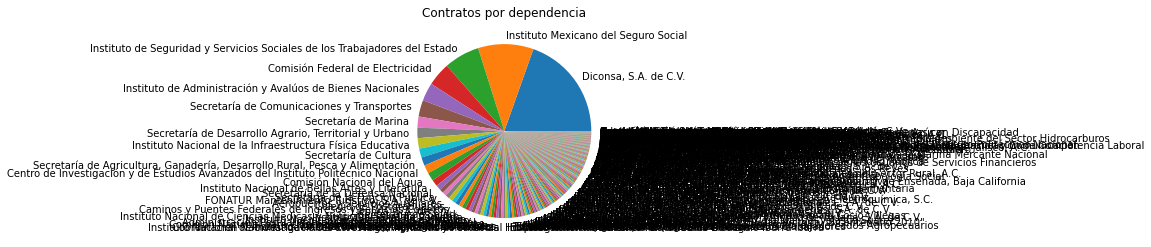

In [24]:
fig, ax = plt.subplots()
ax.pie(df.dependency.value_counts(), labels = df.dependency.value_counts().index)
ax.set_title('Contratos por dependencia')

In [46]:
def group_lower_hiring_values(column,quantile=.75):
    hiring_couts = df.groupby(column).agg('count')
    pct_value = hiring_couts[lambda x: x.columns[0]].quantile(quantile)
    values_below_pct_value = hiring_couts[lambda x: x.columns[0]].loc[lambda x: x < pct_value].index.values
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Other'
        return row
    hiring_grouped = df.apply(fix_values, axis=1).groupby(column).agg('count')
    return hiring_grouped

In [55]:
hiring_by_dependency = group_lower_hiring_values('dependency',quantile=.90)._id.sort_values()

In [56]:
hiring_by_dependency

dependency
Administración Portuaria Integral de Veracruz, S.A. de C.V.                            1656
Casa de Moneda de México                                                               1661
Instituto Nacional de Antropología e Historia                                          1758
Instituto Nacional de Pediatría                                                        1791
Instituto Nacional de Ciencias Médicas y Nutrición Salvador Zubirán                    2023
Secretaría de Salud                                                                    2036
Liconsa, S.A. de C.V.                                                                  2109
Caminos y Puentes Federales de Ingresos y Servicios Conexos                            2133
Colegio de Postgraduados                                                               2185
Aeropuertos y Servicios Auxiliares                                                     2208
FONATUR Mantenimiento Turístico, S.A. de C.V.                        

Text(0.5, 1.0, 'Contratos por dependencia')

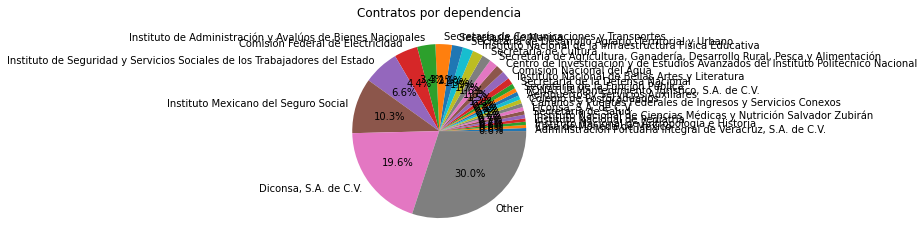

In [57]:
fig, ax = plt.subplots()
ax.pie(hiring_by_dependency, labels = hiring_by_dependency.index,autopct='%1.1f%%')
ax.set_title('Contratos por dependencia')

## Cantidad de contratos por dependencia - Temporalidad (Mes,Trimestre, Año)

In [130]:
df_time = df[df.startDate.notnull()].astype({'startDate':'datetime64', 'endDate':'datetime64'})

In [131]:
df_time.dtypes

_id                       object
cycle                      int64
date                      object
initiationType            object
publisher_name            object
dependency                object
tender                    object
status                    object
startDate         datetime64[ns]
endDate           datetime64[ns]
amount                   float64
currency                  object
dtype: object

In [145]:
df_time.startDate.describe()

<ipython-input-145-ff588ef9ed17>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_time.startDate.describe()


count                  283527
unique                  33038
top       2017-02-15 12:00:00
freq                     5006
first     2013-12-23 12:00:00
last      2019-01-01 12:00:00
Name: startDate, dtype: object

In [ ]:
years = pd.date_range('2013-01-01','2019-08-01')

In [133]:
df_time.status.value_counts()

complete        282976
active             516
unsuccessful        35
Name: status, dtype: int64

In [137]:
df_time.startDate

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [127]:
df_time.loc[:,('duration')] = pd.to_datetime(df_time.endDate) - pd.to_datetime(df_time.startDate)

In [129]:
df_time.duration.describe()

count                         283527
mean     100 days 14:27:55.503285401
std      137 days 13:32:33.196697854
min                -1 days +13:00:00
25%                  9 days 23:59:00
50%                 37 days 23:59:00
75%                156 days 21:00:00
max              10971 days 22:59:00
dtype: object

complete        283167
unsuccessful      5674
active            3448
Name: status, dtype: int64